# Machine Learning Lab _3_ -Prediction of Numeric Values
<hr/>

Submitted by <br>
Name: **D.Vimala Sreevani** <br>
Register Number: **21122019** <br>
Class: **2MSDS** <br> 
<hr/>

## Lab Overview
- Prediction of Numeric Values
### Objectives
- **Common Instructions**
  - Use Pandas to Import the Dataset
  - Do the necessary Exploratory Data Analysis
  - Use the train_test_split method available in SCIKIT to split the dataset into Train Dataset and Test Dataset.
  - Show the Regression Score, Intercept and other parameters etc in the Output
  - Use visualizations and plots wherever possible
  - Format the outputs neatly; Do Documentation, Data Set Description, Objectives, Observations, Conclusions etc as you have done in your previous lab
- **Questions**
    - 1. What are your observations on the Dataset?
    - 2. What are the different Error Measures (Evaluation Metrics) in relation to Linear Regression? How much do you get in the above cases?
    - 3. Note down the errors/losses when the train-test ratio is 50:50, 60:40, 70:30, and 80:20
    - 4. During LinearRegression() process, what is the impact of giving TRUE/FALSE as the value for Normalize Parameter?
- **Cases**
   - Try to predict the rent of the below houses -
   - 1. 1 BHK with 2 Baths in Portofino Street
   - 2. Fully Furnished 2 BHK in School Street
   - 3. Single Room anywhere in Lavasa

### ***Problem Definition***
- using sklearn linear regression to predict the rent price

### References
- https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
- https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
- https://www.justintodata.com/logistic-regression-example-in-python/
- https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

## importing the dataset

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv (r'C:/Users/vimala/Downloads/HousePrices - Lab3.csv')
print (df)

              BuildingType       Location   Size  AreaSqFt  NoOfBath  \
0     Minimum Budget Rooms    Portofino H  1 BHK     400.0         1   
1     Minimum Budget Rooms    Portofino H  1 BHK     450.0         1   
2     Minimum Budget Rooms  School Street  1 BHK     530.0         1   
3     Minimum Budget Rooms    Portofino B  1 BHK     400.0         1   
4     Minimum Budget Rooms  School Street  2 BHK     460.0         1   
..                     ...            ...    ...       ...       ...   
995  Super Furnished Villa    Portofino D  4 BHK    4900.0         4   
996  Super Furnished Villa    Portofino B  4 BHK    3750.0         4   
997  Super Furnished Villa  School Street  4 BHK    5270.0         4   
998  Super Furnished Villa    Portofino B  6 BHK    5100.0         7   
999  Super Furnished Villa    Portofino B  7 BHK    6300.0         6   

     NoOfPeople  NoOfBalcony  RentPerMonth  
0             1            1        1100.0  
1             1            1        1100.0  


In [2]:
df.head()

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
0,Minimum Budget Rooms,Portofino H,1 BHK,400.0,1,1,1,1100.0
1,Minimum Budget Rooms,Portofino H,1 BHK,450.0,1,1,1,1100.0
2,Minimum Budget Rooms,School Street,1 BHK,530.0,1,1,0,1166.0
3,Minimum Budget Rooms,Portofino B,1 BHK,400.0,1,1,0,1400.0
4,Minimum Budget Rooms,School Street,2 BHK,460.0,1,1,0,1500.0


In [3]:
df.describe()

,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1548.270010,2.661000,2.168000,1.544000,10476.633500
std,1345.141175,1.247251,0.959529,0.838312,10509.508971
min,375.000000,1.000000,1.000000,0.000000,1100.000000
25%,1090.000000,2.000000,2.000000,1.000000,4890.500000
50%,1270.000000,2.000000,2.000000,2.000000,7000.000000
75%,1664.250000,3.000000,2.000000,2.000000,11925.000000
max,35000.000000,11.000000,6.000000,3.000000,96000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BuildingType  1000 non-null   object 
 1   Location      1000 non-null   object 
 2   Size          1000 non-null   object 
 3   AreaSqFt      1000 non-null   float64
 4   NoOfBath      1000 non-null   int64  
 5   NoOfPeople    1000 non-null   int64  
 6   NoOfBalcony   1000 non-null   int64  
 7   RentPerMonth  1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [5]:
df["BuildingType"].unique()

array(['Minimum Budget Rooms', 'Semi Furnished Single Room',
       'Semi Furnished Flat', 'Fully Furnished Single Room',
       'Super Furnished Single Room', 'Semi Furnished Villa',
       'Fully Furnished Flat', 'Super Furnished Flat',
       'Fully Furnished Villa', 'Super Furnished Villa'], dtype=object)

In [6]:
df["Location"].unique()

array(['Portofino H', 'School Street', 'Portofino B', 'Portofino A',
       'Clubview Road', 'Portofino C', 'Portofino D', 'Starter Homes',
       'Portofino G', 'Portofino E', 'Portofino F'], dtype=object)

In [7]:
df["Size"].unique()

array(['1 BHK', '2 BHK', '1 RK', '3 BHK', '4 BHK', '5 BHK', '6 BHK',
       '8 BHK', '7 BHK', '9 BHK'], dtype=object)

In [8]:
df['BuildingType'].replace(['Minimum Budget Rooms', 'Semi Furnished Single Room',
       'Semi Furnished Flat', 'Fully Furnished Single Room',
       'Super Furnished Single Room', 'Semi Furnished Villa',
       'Fully Furnished Flat', 'Super Furnished Flat',
       'Fully Furnished Villa', 'Super Furnished Villa'],
                        [0,1,3,4,5,6,7,8,9,10], inplace=True)
df.head()

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
0,0,Portofino H,1 BHK,400.0,1,1,1,1100.0
1,0,Portofino H,1 BHK,450.0,1,1,1,1100.0
2,0,School Street,1 BHK,530.0,1,1,0,1166.0
3,0,Portofino B,1 BHK,400.0,1,1,0,1400.0
4,0,School Street,2 BHK,460.0,1,1,0,1500.0


In [9]:
df['Location'].replace(['Portofino H', 'School Street', 'Portofino B', 'Portofino A',
       'Clubview Road', 'Portofino C', 'Portofino D', 'Starter Homes',
       'Portofino G', 'Portofino E', 'Portofino F'],
                        [0,1,3,4,5,6,7,8,9,10,11], inplace=True)
df.head()

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
0,0,0,1 BHK,400.0,1,1,1,1100.0
1,0,0,1 BHK,450.0,1,1,1,1100.0
2,0,1,1 BHK,530.0,1,1,0,1166.0
3,0,3,1 BHK,400.0,1,1,0,1400.0
4,0,1,2 BHK,460.0,1,1,0,1500.0


In [10]:
df['Size'].replace(['1 BHK', '2 BHK', '1 RK', '3 BHK', '4 BHK', '5 BHK', '6 BHK',
       '8 BHK', '7 BHK', '9 BHK'],
                        [0,1,3,4,5,6,7,8,9,10], inplace=True)
df.head()

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
0,0,0,0,400.0,1,1,1,1100.0
1,0,0,0,450.0,1,1,1,1100.0
2,0,1,0,530.0,1,1,0,1166.0
3,0,3,0,400.0,1,1,0,1400.0
4,0,1,1,460.0,1,1,0,1500.0


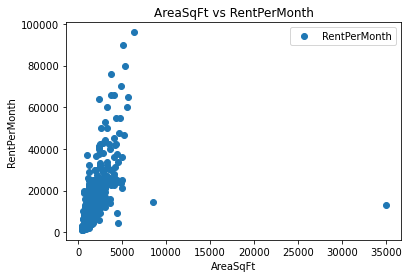

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df.plot(x='AreaSqFt', y='RentPerMonth', style='o')
plt.title('AreaSqFt vs RentPerMonth')
plt.xlabel('AreaSqFt')
plt.ylabel('RentPerMonth')
plt.show()

In [12]:
X = df[['BuildingType','Location','Size','AreaSqFt','NoOfBath','NoOfPeople','NoOfBalcony']]
Y = df[['RentPerMonth']]
print(X.head(10))

   BuildingType  Location  Size  AreaSqFt  NoOfBath  NoOfPeople  NoOfBalcony
0             0         0     0     400.0         1           1            1
1             0         0     0     450.0         1           1            1
2             0         1     0     530.0         1           1            0
3             0         3     0     400.0         1           1            0
4             0         1     1     460.0         1           1            0
5             0         4     0     600.0         1           1            1
6             1         1     0     654.0         1           1            0
7             1         1     0     645.0         1           1            1
8             1         1     0     645.0         1           1            1
9             1         5     1     880.0         1           1            1


In [13]:
print(Y.head(10))

   RentPerMonth
0        1100.0
1        1100.0
2        1166.0
3        1400.0
4        1500.0
5        1500.0
6        1513.5
7        1645.0
8        1645.0
9        1650.0


## spliting the data
- the above script splits 60% of the data to training set while 40% of the data to test set

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
print(X_train)

     BuildingType  Location  Size  AreaSqFt  NoOfBath  NoOfPeople  NoOfBalcony
671             3         0     4    1740.0         2           2            0
109             1         4     1     750.0         2           1            1
661             4         6     1    1278.0         2           2            2
379             1         0     1    1460.0         2           2            1
625             3         3     1    1308.0         2           3            2
..            ...       ...   ...       ...       ...         ...          ...
835             6         5     4    1850.0         3           2            3
192             0         1     4    1075.0         2           1            1
629             4         7     5    1200.0         4           3            0
559             3         5     4    1650.0         3           2            2
684             3         5     5    2225.0         4           2            0

[600 rows x 7 columns]


In [56]:
print(y_train)

     RentPerMonth
671        9500.0
109        3800.0
661        9500.0
379        5800.0
625        8904.0
..            ...
835       15000.0
192        4500.0
629        9000.0
559        7800.0
684        9888.0

[600 rows x 1 columns]


In [57]:
print(X_train.shape)
print(X_test.shape)

(600, 7)
(400, 7)


In [58]:
print(y_train.shape)
print(y_test.shape)

(600, 1)
(400, 1)


### making use of sklearn.linear_model
#### What are your observations on the Dataset?
#### What are the different Error Measures (Evaluation Metrics) in relation to Linear Regression? How much do you get in the above cases?

#### Note down the errors/losses when the train-test ratio is 50:50, 60:40, 70:30, and 80:20

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
l1=[0.5,0.4,0.3,0.2]
for i in l1:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i, random_state=0)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print ('Score:', regressor.score(X_test, y_test),'for ',i)
    print('**********************************************************************************')

Score: 0.755515459826479 for  0.5
**********************************************************************************
Score: 0.7499314754616222 for  0.4
**********************************************************************************
Score: 0.7335719190928196 for  0.3
**********************************************************************************
Score: 0.7475866820046133 for  0.2
**********************************************************************************


In [59]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### During LinearRegression() process, what is the impact of giving TRUE/FALSE as the value for Normalize Parameter?
 - If this parameter is set to True, the regressor X will be normalized before regression. The normalization will be done by subtracting the mean and dividing it by L2 norm. If fit_intercept = False, this parameter will be ignored.

In [60]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True,normalize=True)
reg.fit(X_train, y_train)

C:\Users\vimala\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [61]:
print(regressor.intercept_)

[-5942.94732054]


In [62]:
print(reg.intercept_)

[-5942.94732054]


In [63]:
print(regressor.coef_)

[[ 2.12288025e+03 -5.51320299e+01 -4.45890889e+02  5.09173637e-01
   1.29892059e+03  3.29999485e+03  1.08867649e+02]]


In [86]:
y_pred = regressor.predict(X_test)
y_pred

array([[ 3.87381323e+04],
       [ 1.42295172e+04],
       [ 5.67862945e+03],
       [ 9.57606426e+03],
       [ 1.12049545e+04],
       [ 3.91072764e+04],
       [-1.62066068e+03],
       [-1.55929758e+03],
       [ 5.38451810e+03],
       [ 1.18283956e+04],
       [ 8.55672078e+03],
       [ 9.51921264e+03],
       [ 1.04334793e+04],
       [ 5.65654899e+03],
       [ 1.19010814e+04],
       [-1.53062338e+02],
       [ 2.36422505e+04],
       [ 2.34359713e+03],
       [-1.36801898e+03],
       [ 3.48844779e+03],
       [ 1.91875927e+03],
       [ 9.76266374e+03],
       [ 5.68881292e+03],
       [ 5.46191250e+03],
       [ 1.93173400e+04],
       [ 1.42729029e+04],
       [-6.09974188e+01],
       [-1.44686572e+03],
       [ 1.48823441e+04],
       [-1.00603610e+03],
       [ 1.94044849e+04],
       [ 1.37370501e+04],
       [ 1.17428544e+04],
       [ 1.16407882e+04],
       [ 1.32247629e+04],
       [ 1.19993926e+04],
       [ 3.04341108e+04],
       [ 5.19402106e+03],
       [ 2.3

In [82]:
y_pred1 = reg.predict(X_test)
y_pred1

array([[ 3.87381323e+04],
       [ 1.42295172e+04],
       [ 5.67862945e+03],
       [ 9.57606426e+03],
       [ 1.12049545e+04],
       [ 3.91072764e+04],
       [-1.62066068e+03],
       [-1.55929758e+03],
       [ 5.38451810e+03],
       [ 1.18283956e+04],
       [ 8.55672078e+03],
       [ 9.51921264e+03],
       [ 1.04334793e+04],
       [ 5.65654899e+03],
       [ 1.19010814e+04],
       [-1.53062338e+02],
       [ 2.36422505e+04],
       [ 2.34359713e+03],
       [-1.36801898e+03],
       [ 3.48844779e+03],
       [ 1.91875927e+03],
       [ 9.76266374e+03],
       [ 5.68881292e+03],
       [ 5.46191250e+03],
       [ 1.93173400e+04],
       [ 1.42729029e+04],
       [-6.09974188e+01],
       [-1.44686572e+03],
       [ 1.48823441e+04],
       [-1.00603610e+03],
       [ 1.94044849e+04],
       [ 1.37370501e+04],
       [ 1.17428544e+04],
       [ 1.16407882e+04],
       [ 1.32247629e+04],
       [ 1.19993926e+04],
       [ 3.04341108e+04],
       [ 5.19402106e+03],
       [ 2.3

Text(0, 0.5, 'Predictions')

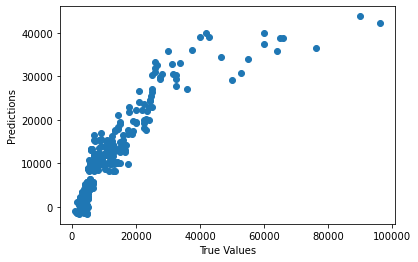

In [84]:
plt.scatter(y_test,y_pred )
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [66]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:',metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3263.5335587435243
Mean Squared Error: 37326928.63642208
Root Mean Squared Error: 6109.576796834793
R^2: 0.7499314754616222


### creating validation dataset to test the model

In [67]:
buildingtypes=['Minimum Budget Rooms -0', 'Semi Furnished Single Room -1',
       'Semi Furnished Flat - 2', 'Fully Furnished Single Room -3',
       'Super Furnished Single Room -4', 'Semi Furnished Villa -5',
       'Fully Furnished Flat -6', 'Super Furnished Flat-7',
       'Fully Furnished Villa - 8', 'Super Furnished Villa -9']
Location=['Portofino H-1', 'School Street-2', 'Portofino B-', 'Portofino A-3',
       'Clubview Road-4', 'Portofino C-5', 'Portofino D-6', 'Starter Homes-8',
       'Portofino G-9', 'Portofino E-10', 'Portofino F-11']
Size=['1 BHK-0', '2 BHK-1', '1 RK=2', '3 BHK-3', '4 BHK-4', '5 BHK-5', '6 BHK-6',
       '8 BHK-7', '7 BHK-8', '9 BHK-9']


#### setting the default value in case user does not provide the input

In [80]:
df2=pd.DataFrame(columns = ['BuildingType','Location','Size','AreaSqFt','NoOfBath','NoOfPeople','NoOfBalcony'])
for i in range(1):
    print('buildingtypes',buildingtypes)
    print('**************************')
    print('Location',Location)
    print('******************************')
    print('Size',Size)
    print("********************************")
    data={'BuildingType':int(input('enter the value') or 0),'Location':int(input('enter the location') or 0),'Size':int(input('enter the size= ') or 0),'AreaSqFt':int(input('enter the area sqft= ') or 200),'NoOfBath':int(input('enter the number of bathrooms = ') or 1),'NoOfPeople':int(input('enter the number of people = ')or 2),'NoOfBalcony':int(input('enter the number of balcony')or 0)}
    df2=df2.append(data,ignore_index=True)
df2

buildingtypes ['Minimum Budget Rooms -0', 'Semi Furnished Single Room -1', 'Semi Furnished Flat - 2', 'Fully Furnished Single Room -3', 'Super Furnished Single Room -4', 'Semi Furnished Villa -5', 'Fully Furnished Flat -6', 'Super Furnished Flat-7', 'Fully Furnished Villa - 8', 'Super Furnished Villa -9']
**************************
Location ['Portofino H-1', 'School Street-2', 'Portofino B-', 'Portofino A-3', 'Clubview Road-4', 'Portofino C-5', 'Portofino D-6', 'Starter Homes-8', 'Portofino G-9', 'Portofino E-10', 'Portofino F-11']
******************************
Size ['1 BHK-0', '2 BHK-1', '1 RK=2', '3 BHK-3', '4 BHK-4', '5 BHK-5', '6 BHK-6', '8 BHK-7', '7 BHK-8', '9 BHK-9']
********************************
enter the value3
enter the location4
enter the size= 3
enter the area sqft= 500
enter the number of bathrooms = 3
enter the number of people = 5
enter the number of balcony2


,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony
0,3,4,3,500,3,5,2


### this is the predicted rent peice

In [81]:
y_pred1 = regressor.predict(df2)
y_pred1

array([[19736.55074987]])

## 19736.55 is the predicted value rentpeice